In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [6]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [7]:
att['Salnty'] = normalization(att['Salnty'])
att['T_degC'] = normalization(att['T_degC'])

In [8]:
batchSize = 100

In [9]:
x_data = att['Salnty'].loc[:batchSize].tolist()
y_data = att['T_degC'].loc[:batchSize].tolist()
# y_data = b + w * data_x

# att['T_degC'].tolist()
# att['Salnty'].tolist()

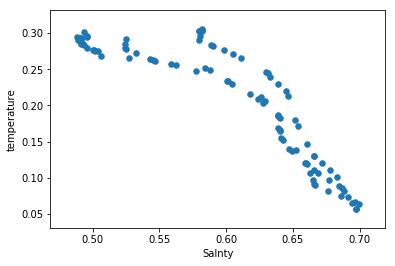

In [10]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('temperature')
plt.show()

In [11]:
b = random.uniform(-1, 1) # initial b
w = random.uniform(-1, 1) # initial w
lr = 1 # learning rate
iteration = 500

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# let the learning be different
lr_b = 0
lr_w = 0


# interation start, using gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = (y_data[n] - (b + w*x_data[n]))**2
        
        # 使用 x b 找出目前 function 的斜率
        b_grad = b_grad - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    #using Adagrad to for leanring rate(?)
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    print(b, w, loss)
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

-0.3435959192972613 -0.6111763702284666 0.3645613572916172
0.46003817950726356 0.18690317420039848 0.8815867100331971
0.15739124669298682 -0.12181487099326083 0.08870715769604676
0.260703757941521 -0.02474232950673705 0.0297066590826724
0.23014175835187176 -0.06149906217974696 0.0002676726610403625
0.24316806388470447 -0.05465480996342406 0.004471761695373019
0.2420064450291501 -0.0619709748508182 0.0025130600258854293
0.24544636594897154 -0.06466269727030978 0.0030539616850415044
0.24737806759394476 -0.06883829045933834 0.0028391404540462797
0.24978825272889665 -0.07251165098375954 0.0028748954710017378
0.25203098131448143 -0.07632864486227312 0.002830395793858881
0.25431632695088546 -0.08007934728881747 0.00281221119032821
0.25657603197512746 -0.08383209056501652 0.0027857824882182823
0.258832335800436 -0.08756473394987209 0.0027622894821368892
0.26107805374299975 -0.09128455236631967 0.0027381102246744156
0.2633155676225518 -0.0949892565321116 0.002714415026637415
0.2655441487627981

0.733201903920399 -0.8730722642033522 1.8544034778708085e-05
0.7335960152142063 -0.8737248727180041 1.8200402835136903e-05
0.7339885889651425 -0.8743749352176606 1.7861306419296313e-05
0.734379631172348 -0.8750224616362804 1.752670295601233e-05
0.7347691478115471 -0.875667461869048 1.719655022999867e-05
0.7351571448351402 -0.8763099457725252 1.6870806382936796e-05
0.7355436281722938 -0.8769499231648021 1.6549429910588215e-05
0.7359286037290326 -0.8775874038256475 1.6232379659928793e-05
0.7363120773883287 -0.8782223974966583 1.59196148262997e-05
0.7366940550101927 -0.878854913881409 1.561109495059055e-05
0.7370745424317627 -0.8794849626455999 1.5306779916433074e-05
0.7374535454673938 -0.8801125534172057 1.5006629947428309e-05
0.7378310699087477 -0.8807376957866221 1.4710605604392312e-05
0.7382071215248803 -0.8813603993068131 1.4418667782614995e-05
0.7385817060623311 -0.8819806734934572 1.413077770915713e-05
0.7389548292452106 -0.8825985278250931 1.3846896940153227e-05
0.7393264967752877

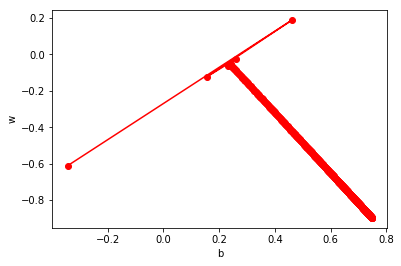

In [12]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

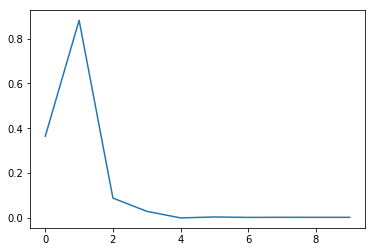

In [13]:
# visualize the loss
fig = plt.figure()
plt.plot(range(0,10), loss_history[0:10])    
plt.show()

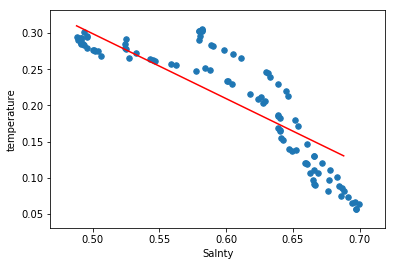

In [14]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('temperature')

x = np.arange(min(x_data), max(x_data), 0.1)
y = w*x + b
plt.plot(x, y, color = 'red')
plt.show()